# Videos and Exercises for Session 11: Regression and Regularization

In this combined teaching module and exercise set, you will learn about linear regression models in a machine learning perspective. We will see how overfitting can arise and how we can tackle it with a modification of the linear regression model.

The structure of this notebook is as follows:
1. Linear Regression Mechanics
2. Overfitting and Underfitting in Linear Regression
    - Exploring Overfitting in Linear Regression
    - A Cure for Overfitting in Linear Regression
3. Modelling Houseprices (Exercise)

## Packages
First, we need to import our standard stuff. Notice that we are not interested in seeing the convergence warning in scikit-learn, so we suppress them for now.

In [31]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

%matplotlib inline

# Part 1: Linear Regression Mechanics
## Implementing and evaluating the gradient decent 
 
Normally we use OLS to estimate linear regression models, but this is only way of solving the problem of minimizing the least squares problem (that minimizes the sum of squared errors). In the video below we show how to implement gradient descent below and compare it along with other approximate solutions to OLS.

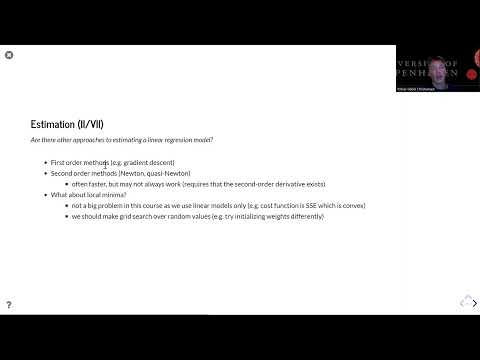

In [32]:
from IPython.display import YouTubeVideo
YouTubeVideo('XidjsIseyv0', width=640, height=360)

We continue straight to an exercise where you are to implement a new estimator that we code up from scratch. We solve the numerical optimization using the gradient decent algorithm. This will be very similar to what we just saw in the video, but we will pay a bit more attention to each step in the process.

Using our algorithm, we will fit it to some data, and compare our own solution to the standard solution from `sklearn`

> **Ex. 11.1.0**: Import the dataset `tips` from the `seaborn`.


*Hint*: use the `load_dataset` method in seaborn

In [33]:
# Load the tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> **Ex. 11.1.1**: Convert non-numeric variables to dummy variables for each category (remember to leave one column out for each catagorical variable, so you have a reference). Restructure the data so we get a dataset `y` containing the variable tip, and a dataset `X` containing the 
features. 

> *Hint*: You might want to use the `get_dummies` method in pandas, with the `drop_first = True` parameter. 

In [34]:
# Convert non-numeric variables to dummy variables
tips_dummies = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Create the target variable (y) and features (X)
X = tips_dummies.drop('tip', axis=1)
y = tips_dummies['tip']

# Display the first few rows of the restructured data
print("Target variable (y):")
print(y.head())

print("\nFeatures (X):")
print(X.head())

Target variable (y):
0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

Features (X):
   total_bill  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0       16.99     2           1          1        0        0        1   
1       10.34     3           0          1        0        0        1   
2       21.01     3           0          1        0        0        1   
3       23.68     2           0          1        0        0        1   
4       24.59     4           1          1        0        0        1   

   time_Dinner  
0            1  
1            1  
2            1  
3            1  
4            1  


> **Ex. 11.1.2**: Divide the features and target into test and train data. Make the split 50 pct. of each. The split data should be called `X_train`, `X_test`, `y_train`, `y_test`.

> *Hint*: You may use `train_test_split` in `sklearn.model_selection`.

In [35]:
from sklearn.model_selection import train_test_split

# Divide the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=161193)

# Display the shapes of the train and test data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (122, 8)
X_test shape: (122, 8)
y_train shape: (122,)
y_test shape: (122,)


> **Ex. 11.1.3**: Normalize your features by converting to zero mean and one std. deviation.

> *Hint*: Take a look at `StandardScaler` in `sklearn.preprocessing`. If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [36]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the first few rows of the scaled training data
print("Scaled X_train:")
print(X_train[:5, :])


Scaled X_train:
[[-0.62587655 -0.6624478   1.28536917  0.80538727 -0.31480009 -0.64699664
   1.45883691  0.68547758]
 [-0.37833649 -0.6624478   1.28536917  0.80538727 -0.31480009 -0.64699664
   1.45883691  0.68547758]
 [-1.17138148 -1.67268068  1.28536917  0.80538727 -0.31480009 -0.64699664
  -0.68547758 -1.45883691]
 [-0.78746519 -0.6624478  -0.77798661 -1.2416387   3.17661913 -0.64699664
  -0.68547758 -1.45883691]
 [-0.30957537  0.34778509 -0.77798661  0.80538727 -0.31480009  1.54560308
  -0.68547758  0.68547758]]


> **Ex. 11.1.4**: Make a function called `compute_error` to compute the prediction errors given input target `y_`, input features `X_` and input weights `w_`. You should use matrix multiplication.
>
> *Hint:* You can use the net-input fct. from yesterday.



In [37]:
def net_input(X_, w_):    
    ''' Computes the matrix product between X and w. Note that
    X is assumed not to contain a bias/intercept column.'''
    return np.dot(X_, w_[1:]) + w_[0]   # We have to add w_[0] separately because this is the constant term. We could also have added a constant term (columns of 1's to X_ and multipliced it to all of w_)

def compute_error(y_, X_, w_):
    return y_ - net_input(X_, w_)

> **Ex. 11.1.5**: Make a function to update the weights given input target `y_`, input features `X_` and input weights `w_` as well as learning rate, $\eta$, i.e. greek `eta`. You should use matrix multiplication.

In [38]:
# INCLUDED IN ASSIGNMENT 2

In [39]:
def update_weights(y_, X_, w_, eta):
    errors = compute_error(y_, X_, w_)
    update = eta * (np.dot(X_.T, errors))
    w_[1:] += update
    w_[0] += eta * errors.sum()
    return w_


> **Ex. 11.1.6**: Use the code below to initialize weights `w` at zero given feature set `X`. Notice how we include an extra weight that includes the bias term. Set the learning rate `eta` to 0.001. Make a loop with 50 iterations where you iteratively apply your weight updating function. 

>```python
w = np.zeros(1+X_train.shape[1])
```

In [40]:
# INCLUDED IN ASSIGNMENT 2

In [41]:
w = np.zeros(1 + X_train.shape[1])
eta = 0.001
num_iterations = 50

for _ in range(num_iterations):
    w = update_weights(y_train, X_train, w, eta)

# Print the updated weights after the iterations
print("Updated Weights after Iterative Updating:")
print(w)

Updated Weights after Iterative Updating:
[ 3.00312568e+00  5.67868318e-01  3.00163110e-01  6.97063694e-02
 -2.30972896e-02  1.91950183e-02 -1.31418692e-01  1.42525210e-03
  5.82506023e-02]


> **Ex. 11.1.7**: Make a function to compute the mean squared error. Alter the loop so it makes 100 iterations and computes the MSE for test and train after each iteration, plot these in one figure. 

> Hint: You can use the following code to check that your model works:
>```python
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
assert((w[1:] - reg.coef_).sum() < 0.01)
```

<AxesSubplot:>

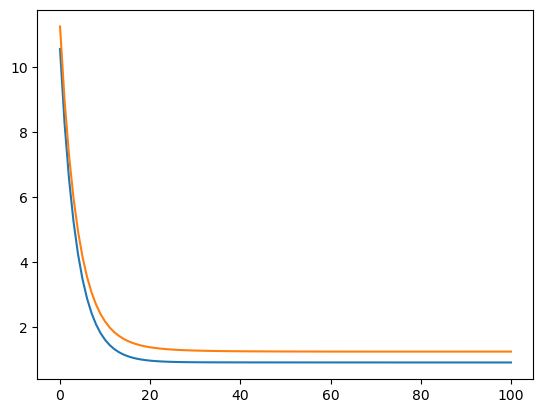

In [42]:
def MSE(y_,X_,w_):
    return (compute_error(y_, X_, w_)**2).mean()
    
w = np.zeros(1+X_train.shape[1])

MSE_train = [MSE(y_train, X_train, w)]
MSE_test = [MSE(y_test, X_test, w)]

for i in range(100):
    w = update_weights(y_train, X_train, w, eta)
    MSE_train.append(MSE(y_train, X_train, w))
    MSE_test.append(MSE(y_test, X_test, w))

pd.Series(MSE_train).plot()
pd.Series(MSE_test).plot()


# Part 2: Overfitting and Underfitting in Linear Regression 

## Exploring Overfitting in Linear Regression
How does overfitting manifest itself in linear regression? In the video below we simulate what happens as make a better and better taylor approximation, i.e. we estimate a polynomial of higher and higher order. Two issues arise simultaneously - one is related to the number of parameters and the to the size of the parameters. 

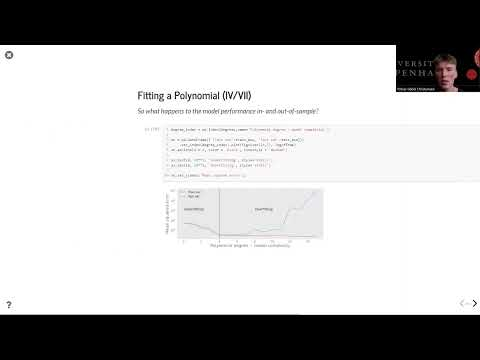

In [43]:
YouTubeVideo('NPARac_fnXw', width=640, height=360)

## A Cure for Overfitting in Linear Regression

How do we fix the two issues of excessively large weights/coefficients and too many spurious solutions? The video below provides a solution by directly incorporating these issues into the optimization problem.

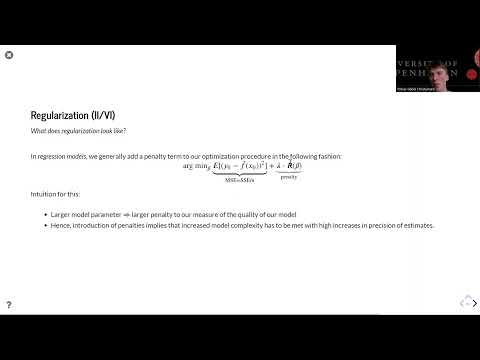

In [44]:
YouTubeVideo('SzPuyUCA5Mw', width=640, height=360)

Above we tackled overfitting, but what about ***underfitting***? The video below shows how to address underfitting and also zooms in on some important details about regularization.

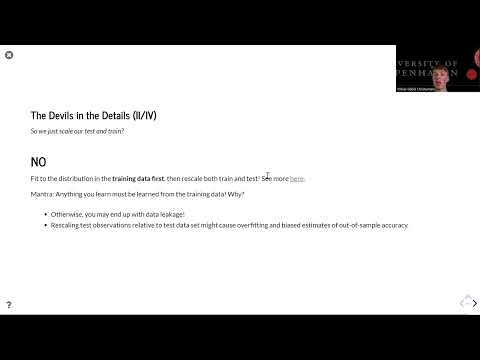

In [45]:
YouTubeVideo('64VOY77PHPk', width=640, height=360)

> **Ex. 11.2.1 (BONUS)**: Is it possible to add a penalty to our linear model above and solve this Lasso model with gradient descent? Is there a simple fix?
>
> *Hint:* Gradient descent essentially relies on a differentiable loss function (read more [here](https://stats.stackexchange.com/questions/177800/why-proximal-gradient-descent-instead-of-plain-subgradient-methods-for-lasso))

In [46]:
def update_weights_with_l1(y_, X_, w_, learning_rate, lambda_):
    errors = compute_error(y_, X_, w_)
    gradient = -np.dot(errors, X_)
    l1_penalty = lambda_ * np.sign(w_)
    w_updated = w_ - learning_rate * (gradient + l1_penalty)
    return w_updated

**ANSWER**: No, we cannot exactly solve for the Lasso with gradient descent.
However, we can make an approximate solution which is pretty close and quite intuitive

# Part 3: Modelling Houseprices
In this example, we will try to predict houseprices using a lot of variable (or features as they are called in Machine Learning). We are going to work with Kaggle's dataset on house prices, see information [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Kaggle is an organization that hosts competitions in building predictive models.

> **Ex. 11.3.0:** Load the california housing data with scikit-learn using the code below. Now:
> 1. Inspect *cal_house*. How are the data stored?
> 2. Create a pandas DataFrame called *X*, using `data`. Name the columns using `feature_names`.
> 3. Crate a pandas Series called *y* using `target`.
> 4. Make a train test split of equal size.

In [47]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()    

X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)

X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000
mean,3.874334,28.506977,5.448060,1.098334,1426.466860,3.046432
std,1.875069,12.638869,2.710030,0.543761,1098.387561,7.727201
min,0.499900,1.000000,0.888889,0.333333,5.000000,1.060606
25%,2.579425,18.000000,4.462767,1.006410,787.750000,2.428799
50%,3.549850,29.000000,5.235723,1.048780,1162.500000,2.822316
75%,4.736450,37.000000,6.070853,1.098592,1726.250000,3.281516
max,15.000100,52.000000,141.909091,34.066667,16305.000000,599.714286




> **Ex.11.3.1**: Generate interactions between all features to third degree (make sure you **exclude** the bias/intercept term). How many variables are there? Will OLS fail? After making interactions, rescale the features to have zero mean, unit std. deviation. Should you use the distribution of the training data to rescale the test data?  

> *Hint 1*: Try importing `PolynomialFeatures` from `sklearn.preprocessing`

> *Hint 2*: If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [48]:
# INCLUDED IN ASSIGNMENT 2

In [49]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Generate polynomial features up to the third degree
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Rescale the features to have zero mean and unit std. deviation
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Number of variables after generating interactions
num_variables = X_train_scaled.shape[1]
print("Number of variables after generating interactions:", num_variables)



Number of variables after generating interactions: 83


> **Ex.11.3.2**: Estimate the Lasso model on the rescaled train data set, using values of $\lambda$ in the range from $10^{-4}$ to $10^4$. For each $\lambda$  calculate and save the Root Mean Squared Error (RMSE) for the rescaled test and train data. Take a look at the fitted coefficients for different sizes of $\lambda$. What happens when $\lambda$ increases? Why?

> *Hint 1*: use `logspace` in numpy to create the range.

> *Hint 2*: read about the `coef_` feature [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso).


In [50]:
# INCLUDED IN ASSIGNMENT 2

In [51]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Range of lambda values
lambda_values = np.logspace(-4, 4, num=9)

train_rmse_list = []
test_rmse_list = []
coefficients_list = []

for lambda_val in lambda_values:
    lasso_model = Lasso(alpha=lambda_val)
    lasso_model.fit(X_train_scaled, y_train)
    
    # Calculate predictions
    train_predictions = lasso_model.predict(X_train_scaled)
    test_predictions = lasso_model.predict(X_test_scaled)
    
    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    coefficients_list.append(lasso_model.coef_)

# Print RMSE values for different lambda values
for i, lambda_val in enumerate(lambda_values):
    print(f"Lambda: {lambda_val:.4e} - Train RMSE: {train_rmse_list[i]:.4f}, Test RMSE: {test_rmse_list[i]:.4f}")

# Print coefficients for different lambda values
for i, lambda_val in enumerate(lambda_values):
    print(f"Lambda: {lambda_val:.4e} - Coefficients: {coefficients_list[i]}")

Lambda: 1.0000e-04 - Train RMSE: 0.6981, Test RMSE: 8.3697
Lambda: 1.0000e-03 - Train RMSE: 0.7018, Test RMSE: 4.6827
Lambda: 1.0000e-02 - Train RMSE: 0.7497, Test RMSE: 0.7626
Lambda: 1.0000e-01 - Train RMSE: 0.8128, Test RMSE: 0.8193
Lambda: 1.0000e+00 - Train RMSE: 1.1503, Test RMSE: 1.1576
Lambda: 1.0000e+01 - Train RMSE: 1.1503, Test RMSE: 1.1576
Lambda: 1.0000e+02 - Train RMSE: 1.1503, Test RMSE: 1.1576
Lambda: 1.0000e+03 - Train RMSE: 1.1503, Test RMSE: 1.1576
Lambda: 1.0000e+04 - Train RMSE: 1.1503, Test RMSE: 1.1576
Lambda: 1.0000e-04 - Coefficients: [ 0.44458878  0.02514723 -0.28315034  0.48692357 -0.83788939 -2.23521178
  1.33749579  0.24293649  0.04722138 -0.73282553 -0.22674058 -0.05579968
 -0.40000011 -0.57049154  0.32099407 -0.00478083  0.87034851  0.43661735
 -0.25753121 -0.68399953  0.24248464 -0.32310764  1.45585035  0.39148725
  0.64048462  0.69519472  0.26089116 -1.0476463  -0.5677184  -0.01965693
  0.27008242 -0.1001276   1.25594     0.0317481   0.17597432  0.63198

Increasing lambda in Lasso regression promotes sparsity, reduces overfitting, and simplifies the model by shrinking less important coefficients towards zero. The trade-off is that the model may experience increased bias and reduced fit to the training data. The choice of lambda is crucial and often requires cross-validation techniques to find the optimal value that balances the bias-variance trade-off.

> **Ex.11.3.3**: Make a plot with the lambdas on the x-axis and the RMSE measures on the y-axis. What happens to RMSE for train and test data as $\lambda$ increases? The x-axis should be log scaled. Which one are we interested in minimizing? 

> Bonus: Can you find the lambda that gives the lowest MSE-test score?

In [52]:
# INCLUDED IN ASSIGNMENT 2

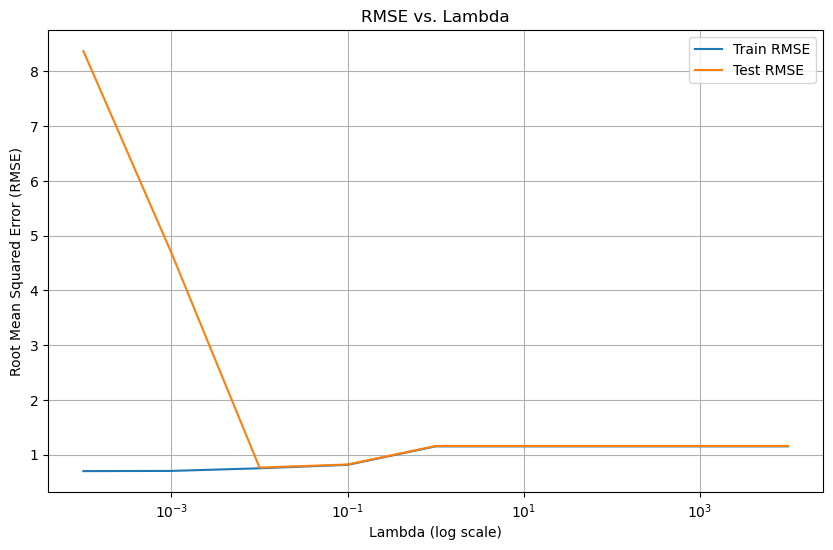

In [53]:
import matplotlib.pyplot as plt

# Plot RMSE values for train and test data against different lambda values
plt.figure(figsize=(10, 6))
plt.semilogx(lambda_values, train_rmse_list, label='Train RMSE')
plt.semilogx(lambda_values, test_rmse_list, label='Test RMSE')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs. Lambda')
plt.legend()
plt.grid(True)
plt.show()



In [54]:
min_test_rmse = min(test_rmse_list)
best_lambda = lambda_values[test_rmse_list.index(min_test_rmse)]
print(f"The lambda that gives the lowest test RMSE: {best_lambda:.4e}")


The lambda that gives the lowest test RMSE: 1.0000e-02
